# Lab 1: Sea Surface Salinity Data Processing
### Liliana Valle
### September 27, 2025



## Summary: Automated Processing of Sea Surface Salinity Data Using ArcPy

	This lab aims to establish an automated workflow for processing NASA's Multi-Mission Optimally Interpolated Sea Surface Salinity (SSS) data using geoprocessing tools through Python in ArcGIS Pro. The dataset consists of 160 global monthly NetCDF files spanning from 2011 to 2024, providing a comprehensive baseline of ocean salinity patterns.
    The methodology involved creating a structured geodatabase environment and developing a Python script that systematically processes each NetCDF file through batch operations. The workflow converts each monthly satellite observation into a geodatabase compatible raster layer while maintaining the global extent of the data. The handling of NetCDF data, automated file iteration with error handling, and proper geodatabase management were the main successes in the script. I developed the structure of the script, with troubleshooting help from Juan and Deepseek. As such, there are some redundancies and clunkiness.
    The results demonstrate a reproducible pipeline that has processed all 160 monthly salinity observations into an analysis ready raster format. This foundational dataset enables the upcoming spatial analysis of salinity patterns, particularly for studying freshwater plumes in regions like the Gulf of Alaska and Amazon River delta. This automated approach ensures that as new monthly data becomes available, it can be incorporated into the analysis. I have presented the tested raster output for September 2011, showing the global range in sea surface salinity in Practical Salinity Units (PSU).
    This workflow represents a favorable improvement over manual processing methods and provides the essential data foundation for subsequent analysis of interannual variability in sea surface salinity patterns as influenced by climate change and freshwater input.





## Section 1: Initial Setup and Module Imports

In [1]:
# This cell sets up the necessary Python libraries and environment.

import arcpy
import os
from arcpy.sa import *  # Import Spatial Analyst tools for CellStatistics
import matplotlib.pyplot as plt

# Check out the Spatial Analyst extension (for CellStatistics)
arcpy.CheckOutExtension("Spatial")

# Set workspace and overwrite output settings
arcpy.env.overwriteOutput = True
project_workspace = r"C:\Users\Liliana\Documents\ArcGIS\Projects\SalinityDrafting"  
arcpy.env.workspace = project_workspace

## Section 2: Creating Geodatabase for outputs

In [2]:
# This cell creates a Geodatabase for the project and sets the workspace to the geodatabase.
# Create a File Geodatabase to store processed data
gdb_name = "Salinity_Analysis.gdb"
gdb_path = os.path.join(project_workspace, gdb_name)

if not arcpy.Exists(gdb_path):
    arcpy.management.CreateFileGDB(project_workspace, gdb_name)
    print(f"Created geodatabase: {gdb_path}")
else:
    print(f"Geodatabase already exists: {gdb_path}")

# Set the current workspace to the geodatabase for all outputs
arcpy.env.workspace = gdb_path
print("Environment setup complete.")

Geodatabase already exists: C:\Users\Liliana\Documents\ArcGIS\Projects\SalinityDrafting\Salinity_Analysis.gdb
Environment setup complete.


## Section 3: Batch NetCDF file processing

In [5]:
# This cell uses a for loop to processes all NETCDF files in a folder, converts them to raster layers, and saves them to the geodatabase.
import glob

netcdf_folder = r"C:\Users\Liliana\Desktop\Monthly Salinity"
netcdf_files = glob.glob(os.path.join(netcdf_folder, "*.nc"))

print(f"Found {len(netcdf_files)} NetCDF files to process")

variable = "sss"
x_dim = "longitude"
y_dim = "latitude"

all_saved_rasters = []

for i, netcdf_file in enumerate(netcdf_files):
    try:
        print(f"Processing {i+1}/{len(netcdf_files)}: {os.path.basename(netcdf_file)}")
        
        base_name = os.path.splitext(os.path.basename(netcdf_file))[0]
        # Extract just the date part (2011-09) and clean it
        base_name = os.path.splitext(os.path.basename(netcdf_file))[0]
        # Extract the date part assuming the format: ..._2011-09.nc
        date_part = base_name.split('_')[-1]  # Gets '2011-09'
        clean_name = date_part.replace('-', '')  # Becomes '201109'

        output_name = f"SSS_{clean_name}"  # e.g., "SSS_201109"
        
        # Create raster layer directly from NetCDF
        arcpy.md.MakeNetCDFRasterLayer(netcdf_file, variable, x_dim, y_dim, "temp_raster")
        
        # Save the full global raster directly to geodatabase 
        arcpy.management.CopyRaster("temp_raster", os.path.join(gdb_path, output_name))
        
        all_saved_rasters.append(output_name)
        arcpy.management.Delete("temp_raster")
        
        print(f"  ✓ Saved full global raster as: {output_name}")
        
    except Exception as e:
        print(f"  ✗ ERROR: {str(e)}")
        continue

print(f"\n=== BATCH PROCESSING COMPLETE ===")
print(f"Processed {len(all_saved_rasters)} full global rasters successfully")
print(f"All rasters saved to: {gdb_path}")

# Save the list of processed rasters for use in later sections
processed_rasters_list = all_saved_rasters
print(f"Raster list saved as 'processed_rasters_list' variable")

Found 160 NetCDF files to process
Processing 1/160: 10_2011.nc
  ✓ Saved full global raster as: SSS_2011
Processing 2/160: OISSS_L4_multimission_global_monthly_v2.0_2011-09.nc
  ✓ Saved full global raster as: SSS_201109
Processing 3/160: OISSS_L4_multimission_global_monthly_v2.0_2011-11.nc
  ✓ Saved full global raster as: SSS_201111
Processing 4/160: OISSS_L4_multimission_global_monthly_v2.0_2011-12.nc
  ✓ Saved full global raster as: SSS_201112
Processing 5/160: OISSS_L4_multimission_global_monthly_v2.0_2012-01.nc
  ✓ Saved full global raster as: SSS_201201
Processing 6/160: OISSS_L4_multimission_global_monthly_v2.0_2012-02.nc
  ✓ Saved full global raster as: SSS_201202
Processing 7/160: OISSS_L4_multimission_global_monthly_v2.0_2012-03.nc
  ✓ Saved full global raster as: SSS_201203
Processing 8/160: OISSS_L4_multimission_global_monthly_v2.0_2012-04.nc
  ✓ Saved full global raster as: SSS_201204
Processing 9/160: OISSS_L4_multimission_global_monthly_v2.0_2012-05.nc
  ✓ Saved full glob

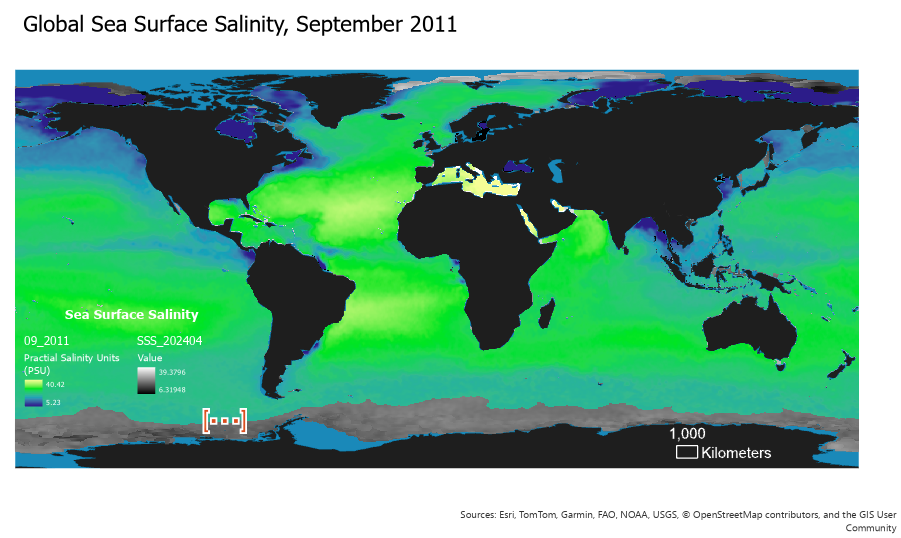

In [4]:
# This cell displays a screenshot of the layout including title, legend, scale bar, etc.

# Path to screenshot
screenshot_path = r"C:\Users\Liliana\Desktop\612 photos\lab1_layout_09_11.png" 

if os.path.exists(screenshot_path):
    display(Image(filename=screenshot_path))